**人工智能第四次作业**

测试安装库

In [1]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0918, 0.1946, 0.3768],
        [0.4637, 0.0093, 0.0703],
        [0.6628, 0.1739, 0.8332],
        [0.1075, 0.9508, 0.4032],
        [0.3736, 0.5957, 0.5424]])


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


导入数据

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [170]:
# 将图片数据从 [0,1] 归一化为 [-1, 1] 的取值范围
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [143]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# 图像预处理和归一化的转换操作
transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# 使用ImageFolder加载数据集
trainset = ImageFolder(root='/shareddata/flowers-102', transform=transform)
trainloader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                              shuffle=False, num_workers=2)
testset = ImageFolder(root='/shareddata/flowers-102', transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                              shuffle=False, num_workers=2)
classes = [
    'pink_primrose', 'hard-leaved_pocket_orchid', 'canterbury_bells', 'sweet_pea', 'english_marigold',
    'tiger_lily', 'moon_orchid', 'bird_of_paradise', 'monkshood', 'globe_thistle', 'snapdragon',
    'colts_foot', 'king_protea', 'spear_thistle', 'yellow_iris', 'globe-flower', 'purple_coneflower',
    'peruvian_lily', 'balloon_flower', 'giant_white_arum_lily', 'fire_lily', 'pincushion_flower',
    'fritillary', 'red_ginger', 'grape_hyacinth', 'corn_poppy', 'prince_of_wales_feathers', 'stemless_gentian',
]

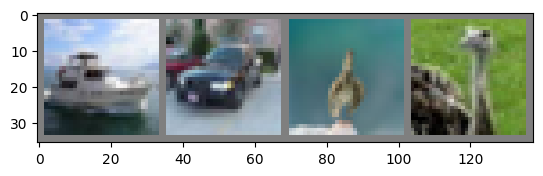

 ship   car  bird  bird


In [171]:
import matplotlib.pyplot as plt
import numpy as np

# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练集图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

构建卷积神经网络

In [172]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [173]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [174]:
import time
# 在 GPU 上训练注意需要将网络和数据放到 GPU 上
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start = time.time()
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time() - start)

[1,  2000] loss: 2.243
[1,  4000] loss: 1.895
[1,  6000] loss: 1.725
[1,  8000] loss: 1.629
[1, 10000] loss: 1.553
[1, 12000] loss: 1.494
[2,  2000] loss: 1.424
[2,  4000] loss: 1.412
[2,  6000] loss: 1.376
[2,  8000] loss: 1.340
[2, 10000] loss: 1.326
[2, 12000] loss: 1.316
Finished Training! Total cost time:  143.74550867080688


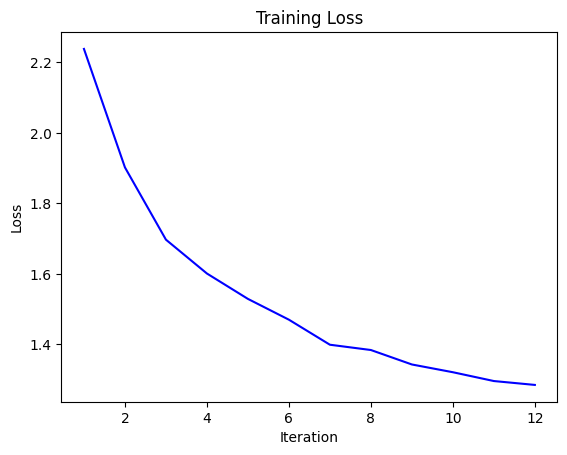

In [102]:
import matplotlib.pyplot as plt

loss_values = [2.238, 1.902, 1.697, 1.601, 1.529, 1.470, 1.399, 1.384, 1.343, 1.321, 1.296, 1.285]

x = range(1, len(loss_values) + 1)
plt.plot(x, loss_values, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

测试模型性能

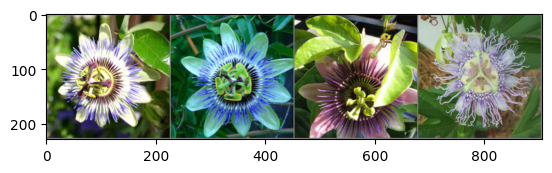

GroundTruth:  pink_primrose pink_primrose pink_primrose pink_primrose


In [168]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [175]:
# 网络输出
net = net.cuda()
images = images.cuda()
labels = labels.cuda()
outputs = net(images)
# 预测结果
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to("cuda")  # 将输入数据移动到GPU上
        labels = labels.to("cuda")

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.to("cuda")

        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 60 %
Accuracy of  bird : 35 %
Accuracy of   cat : 39 %
Accuracy of  deer : 41 %
Accuracy of   dog : 45 %
Accuracy of  frog : 62 %
Accuracy of horse : 63 %
Accuracy of  ship : 77 %
Accuracy of truck : 71 %


In [13]:
total_correct = sum(class_correct)
total_total = sum(class_total)

total_accuracy = 100 * total_correct / total_total

print('Overall Accuracy: %.2f %%' % total_accuracy)

Overall Accuracy: 54.81 %


torchcp

In [14]:
# pip install torchcp

In [15]:
from torchcp.classification.predictors import SplitPredictor, ClusterPredictor, ClassWisePredictor
from torchcp.classification.scores import THR, APS, SAPS, RAPS
from torchcp.classification.utils.metrics import Metrics
from torchcp.utils import fix_randomness

In [16]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [18]:
import argparse
import os
import pickle
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as trn
from tqdm import tqdm

def test_cifar10():
    #######################################
    # Loading CIFAR-10 dataset and a pytorch model
    #######################################
    fix_randomness(seed=100)
    model = torchvision.models.resnet18(pretrained=True)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    cal_data_loader = trainloader
    test_data_loader = testloader

    #######################################
    # A standard process of conformal prediction
    #######################################
    alpha = 0.1
    num_classes = 10
    predictors = [SplitPredictor, ClassWisePredictor, ClusterPredictor]
    score_functions = [THR(),  APS(), RAPS(1, 0), SAPS(0.2)]
    for score in score_functions: 
        for class_predictor in predictors:
            predictor = class_predictor(score, model)
            predictor.calibrate(cal_data_loader, alpha)
            print(f"Experiment--Data : CIFAR-10, Model : ResNet18, Score : {score.__class__.__name__}, Predictor : {predictor.__class__.__name__}, Alpha : {alpha}")
            print(predictor.evaluate(test_data_loader))

In [156]:
# test_cifar10()

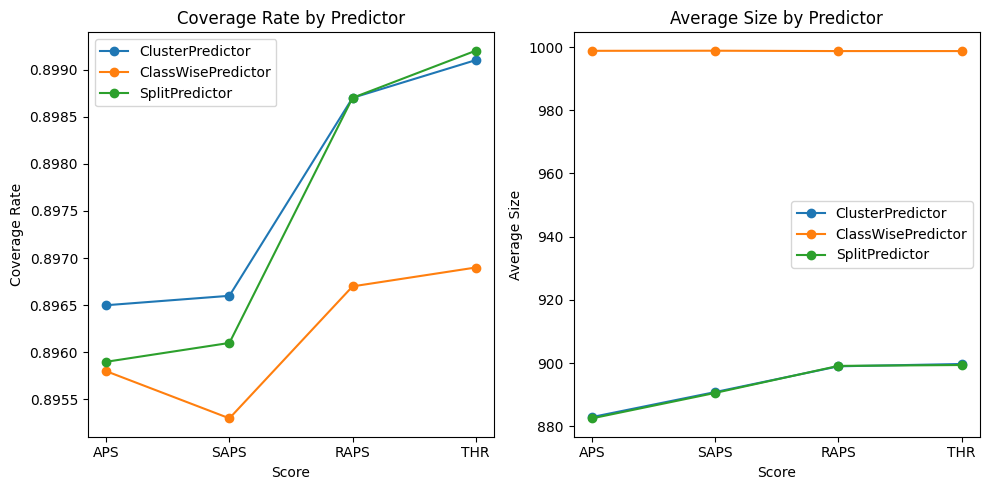

In [106]:
import matplotlib.pyplot as plt

experiments = [
    {'Predictor': 'SplitPredictor', 'Score': 'THR', 'Coverage_rate': 0.8959, 'Average_size': 882.5177},
    {'Predictor': 'ClassWisePredictor', 'Score': 'THR', 'Coverage_rate': 0.8958, 'Average_size': 998.7956},
    {'Predictor': 'ClusterPredictor', 'Score': 'THR', 'Coverage_rate': 0.8965, 'Average_size': 882.9267},
    {'Predictor': 'SplitPredictor', 'Score': 'APS', 'Coverage_rate': 0.8961, 'Average_size': 890.5659},
    {'Predictor': 'ClassWisePredictor', 'Score': 'APS', 'Coverage_rate': 0.8953, 'Average_size': 998.8296},
    {'Predictor': 'ClusterPredictor', 'Score': 'APS', 'Coverage_rate': 0.8966, 'Average_size': 890.8371},
    {'Predictor': 'SplitPredictor', 'Score': 'RAPS', 'Coverage_rate': 0.8987, 'Average_size': 899.1144},
    {'Predictor': 'ClassWisePredictor', 'Score': 'RAPS', 'Coverage_rate': 0.8967, 'Average_size': 998.718},
    {'Predictor': 'ClusterPredictor', 'Score': 'RAPS', 'Coverage_rate': 0.8987, 'Average_size': 898.9786},
    {'Predictor': 'SplitPredictor', 'Score': 'SAPS', 'Coverage_rate': 0.8992, 'Average_size': 899.3885},
    {'Predictor': 'ClassWisePredictor', 'Score': 'SAPS', 'Coverage_rate': 0.8969, 'Average_size': 998.7172},
    {'Predictor': 'ClusterPredictor', 'Score': 'SAPS', 'Coverage_rate': 0.8991, 'Average_size': 899.7142}
]

predictors = list(set(exp['Predictor'] for exp in experiments))
scores = list(set(exp['Score'] for exp in experiments))

# 绘制覆盖率折线图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for predictor in predictors:
    coverage_rates = [exp['Coverage_rate'] for exp in experiments if exp['Predictor'] == predictor]
    x = range(len(coverage_rates))
    plt.plot(x, coverage_rates, marker='o', label=predictor)
plt.xticks(x, scores)
plt.xlabel('Score')
plt.ylabel('Coverage Rate')
plt.title('Coverage Rate by Predictor')
plt.legend()

# 绘制平均大小折线图
plt.subplot(1, 2, 2)
for predictor in predictors:
    avg_sizes = [exp['Average_size'] for exp in experiments if exp['Predictor'] == predictor]
    x = range(len(avg_sizes))
    plt.plot(x, avg_sizes, marker='o', label=predictor)
plt.xticks(x, scores)
plt.xlabel('Score')
plt.ylabel('Average Size')
plt.title('Average Size by Predictor')
plt.legend()

plt.tight_layout()
plt.show()

"THR"代表"Threshold"（阈值）：这些分类器使用了预先定义的阈值来进行预测。具体的阈值策略可能因实验的不同而有所变化。

"APS"代表"Adaptive Predictive Scheduling"（自适应预测调度）：这些分类器根据过去数据的特征进行自适应的预测调度。它们会根据历史数据的模式和趋势，动态地调整预测策略。

"RAPS"代表"Recurrent Adaptive Predictive Scheduling"（递归自适应预测调度）：这些分类器在"APS"的基础上进一步引入了递归的特性。它们会考虑之前的预测结果和真实结果，形成一个递归的预测过程，以提高准确性。

"SAPS"代表"Statistical Adaptive Predictive Scheduling"（统计自适应预测调度）：这些分类器基于统计模型进行预测调度。它们会分析历史数据的统计特征，预测未来的趋势和模式，并相应地调整预测策略。

In [111]:
import matplotlib.pyplot as plt

# Data for the experiments
experiments = [
    "SplitPredictor_THR", "ClassWisePredictor_THR", "ClusterPredictor_THR",
    "SplitPredictor_APS", "ClassWisePredictor_APS", "ClusterPredictor_APS",
    "SplitPredictor_RAPS", "ClassWisePredictor_RAPS", "ClusterPredictor_RAPS",
    "SplitPredictor_SAPS", "ClassWisePredictor_SAPS", "ClusterPredictor_SAPS",
]

coverage_rates = [0.8959, 0.8958, 0.8965, 0.8961, 0.8953, 0.8966, 0.8987, 0.8967, 0.8987, 0.8992, 0.8969, 0.8991]

print("ClusterPredictor_THR","ClusterPredictor_APS","SplitPredictor_RAPS and ClusterPredictor_RAPS","SplitPredictor_SAPS")

ClusterPredictor_THR ClusterPredictor_APS SplitPredictor_RAPS and ClusterPredictor_RAPS SplitPredictor_SAPS


In [158]:
import argparse
import itertools

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchcp.classification.loss import ConfTr
from torchcp.classification.predictors import SplitPredictor, ClusterPredictor, ClassWisePredictor
from torchcp.classification.scores import THR, APS, SAPS, RAPS
from torchcp.utils import fix_randomness


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()


def evaluate_model_on_cifar10():
    alpha = 0.01
    num_trials = 5
    result = {}
    losses = ["CE", "ConfTr"]  # 添加损失函数名称
    for loss in losses:
        print(f"############################## {loss} #########################")
        result[loss] = {}
        
        if loss == "CE":
            criterion = nn.CrossEntropyLoss()
        elif loss == "ConfTr":
            predictor = SplitPredictor(score_function=THR(score_type="log_softmax"))
            criterion = ConfTr(weight=0.01,
                               predictor=predictor,
                               alpha=0.05,
                               fraction=0.5,
                               loss_type="valid",
                               base_loss_fn=nn.CrossEntropyLoss())
        else:
            raise NotImplementedError
        
        for seed in range(num_trials):
            fix_randomness(seed=seed)
            
            # Load CIFAR-10 datasets and create data loaders
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
            ])
            train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
            train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True, pin_memory=True)
            test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
            cal_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [5000, 5000])
            cal_data_loader = torch.utils.data.DataLoader(cal_dataset, batch_size=1600, shuffle=False, pin_memory=True)
            test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1600, shuffle=False, pin_memory=True)
            
            model = Net().to(device)
            optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
            
            for epoch in range(1, 10):
                train(model, device, train_data_loader, criterion, optimizer, epoch)
            
            for score in ["THR", "APS", "RAPS", "SAPS"]:
                if score == "THR":
                    score_function = THR()
                elif score == "APS":
                    score_function = APS()
                elif score == "RAPS":
                    score_function = RAPS(1, 0)
                elif score == "SAPS":
                    score_function = SAPS(weight=0.2)
                
                if score not in result[loss]:
                    result[loss][score] = {}
                    result[loss][score]['Coverage_rate'] = 0
                    result[loss][score]['Average_size'] = 0
                
                predictor = SplitPredictor(score_function, model)
                predictor.calibrate(cal_data_loader, alpha)
                tmp_res = predictor.evaluate(test_data_loader)
                result[loss][score]['Coverage_rate'] += tmp_res['Coverage_rate'] / num_trials
                result[loss][score]['Average_size'] += tmp_res['Average_size'] / num_trials
        
        for score in ["THR", "APS", "RAPS", "SAPS"]:
            print(f"Score: {score}. Result is {result[loss][score]}")


evaluate_model_on_cifar10()


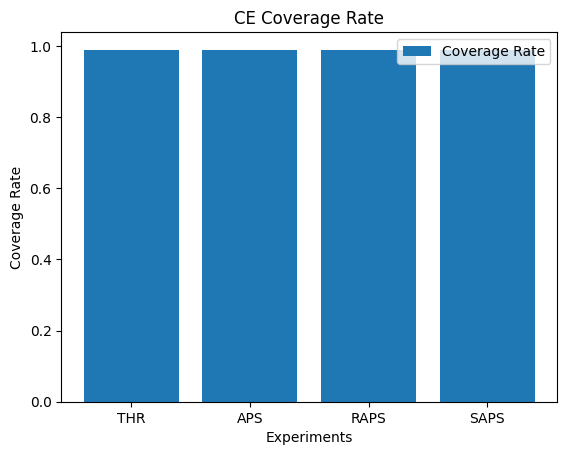

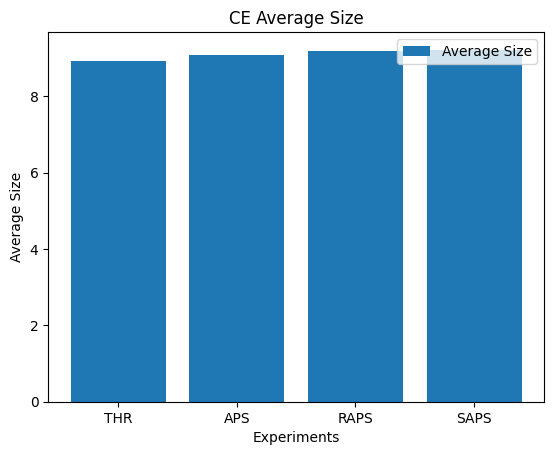

In [146]:
#ce
import matplotlib.pyplot as plt

scores = {
    'THR': {'Coverage_rate': 0.98924, 'Average_size': 8.924},
    'APS': {'Coverage_rate': 0.98852, 'Average_size': 9.078},
    'RAPS': {'Coverage_rate': 0.98916, 'Average_size': 9.19504},
    'SAPS': {'Coverage_rate': 0.98912, 'Average_size': 9.2234}
}

experiments = ['THR', 'APS', 'RAPS', 'SAPS']
coverage_rates = [scores[exp]['Coverage_rate'] for exp in experiments]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the coverage rates
ax.bar(experiments, coverage_rates, label='Coverage Rate')
ax.set_ylabel('Coverage Rate')
ax.set_xlabel('Experiments')

# Set title and legend
ax.set_title('CE Coverage Rate')
ax.legend(loc='upper right')

# Show the plot
plt.show()

average_sizes = [scores[exp]['Average_size'] for exp in experiments]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the average sizes
ax.bar(experiments, average_sizes, label='Average Size')
ax.set_ylabel('Average Size')
ax.set_xlabel('Experiments')

# Set title and legend
ax.set_title('CE Average Size')
ax.legend(loc='upper right')

# Show the plot
plt.show()

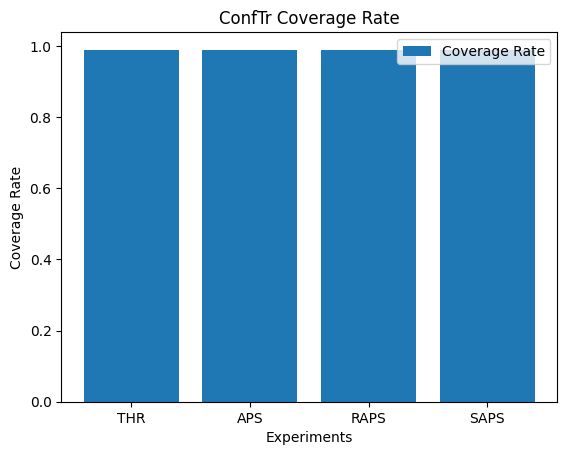

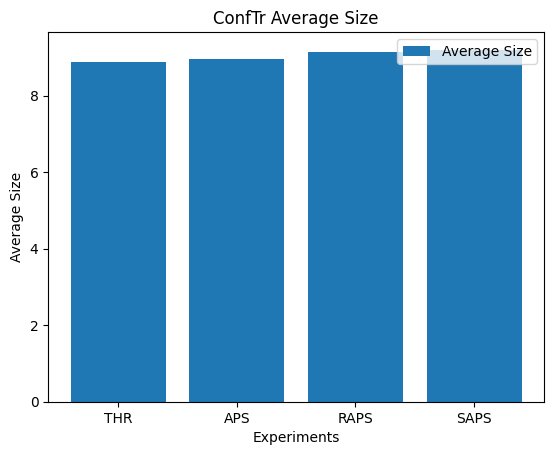

In [147]:
import matplotlib.pyplot as plt

scores = {
    'THR': {'Coverage_rate': 0.98948, 'Average_size': 8.8678},
    'APS': {'Coverage_rate': 0.98912, 'Average_size': 8.95612},
    'RAPS': {'Coverage_rate': 0.98936, 'Average_size': 9.14076},
    'SAPS': {'Coverage_rate': 0.98964, 'Average_size': 9.19716}
}

experiments = ['THR', 'APS', 'RAPS', 'SAPS']
coverage_rates = [scores[exp]['Coverage_rate'] for exp in experiments]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the coverage rates
ax.bar(experiments, coverage_rates, label='Coverage Rate')
ax.set_ylabel('Coverage Rate')
ax.set_xlabel('Experiments')

# Set title and legend
ax.set_title('ConfTr Coverage Rate')
ax.legend(loc='upper right')

# Show the plot
plt.show()

average_sizes = [scores[exp]['Average_size'] for exp in experiments]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the average sizes
ax.bar(experiments, average_sizes, label='Average Size')
ax.set_ylabel('Average Size')
ax.set_xlabel('Experiments')

# Set title and legend
ax.set_title('ConfTr Average Size')
ax.legend(loc='upper right')

# Show the plot
plt.show()

In [162]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchcp.regression.predictors import SplitPredictor, CQR, ACI
from torchvision.datasets import CIFAR10
from torchcp.regression.loss import QuantileLoss
from torchcp.regression import Metrics
from torchcp.utils import fix_randomness

def build_regression_model(model_type):
    if model_type == "NonLinearNet":
        return NonLinearNet
    else:
        raise ValueError("Invalid model type.")

def train(model, device, epoch, train_data_loader, criterion, optimizer):
    model.train()
    for index, (tmp_x, tmp_y) in enumerate(train_data_loader):
        tmp_x, tmp_y = tmp_x.to(device), tmp_y.to(device).float()  # 将 tmp_y 转换为浮点数类型
        optimizer.zero_grad()
        outputs = model(tmp_x)
        loss = criterion(outputs, tmp_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        if index % 500 == 0:
            print(f"Epoch: [{epoch}/{epochs}], Batch: [{index}/{len(train_data_loader)}], Loss: {loss.item()}")

class NonLinearNet(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, dropout):
        super(NonLinearNet, self).__init__()
        self.base_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.base_model(x)

fix_randomness(seed=1)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, pin_memory=True)

alpha = 0.1
quantiles = [alpha / 2, 1 - alpha / 2]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##################################
# Split Conformal Prediction
##################################
print("########################## SplitPredictor ###########################")
model = build_regression_model("NonLinearNet")(32*32*3, 1, 64, 0.5).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 30
for epoch in range(epochs):
    train(model, device, epoch, train_loader, criterion, optimizer)

model.eval()
predictor = SplitPredictor(model)
predictor.calibrate(train_loader, alpha)
print(predictor.evaluate(test_loader))




##################################
# Conformal Quantile Regression
##################################
# print("########################## CQR ###########################")

# model = build_regression_model("NonLinearNet")(32*32*3, 2, 64, 0.5).to(device)
# criterion = QuantileLoss(quantiles)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# epochs = 10
# for epoch in range(epochs):
#     train(model, device, epoch, train_loader, criterion, optimizer)

# model.eval()
# predictor = CQR(model)
# predictor.calibrate(train_loader, alpha)
# print(predictor.evaluate(test_loader))

# ##################################
# # Adaptive Conformal Inference
# ##################################
# print("########################## ACI ###########################")
# model = build_regression_model("NonLinearNet")(32*32*3, 2, 64, 0.5).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# epochs = 10
# for epoch in range(epochs):
#     train(model, device, epoch, train_loader, criterion, optimizer)

# model.eval()
# predictor = ACI(model, 0.0001)
# metrics = Metrics()

predicts = torch.zeros((len(test_loader.dataset), 2)).to(device)
test_y = test_dataset.targets

for i, (test_x, _) in enumerate(test_loader):
    with torch.no_grad():
        cal_x = torch.stack([test_x[0] for _ in range(len(test_loader.dataset))]).to(device)
        cal_dataset = torch.utils.data.TensorDataset(cal_x, torch.tensor(test_y).to(device))
        cal_data_loader = torch.utils.data.DataLoader(cal_dataset, batch_size=100, shuffle=False, pin_memory=False)
        predictor.calibrate(cal_data_loader, alpha)
        tmp_x = test_x[0].unsqueeze(0).to(device)
        if i == 0:
            tmp_prediction_intervals = predictor.predict(tmp_x).unsqueeze(0)
        else:
            tmp_prediction_intervals = predictor.predict(tmp_x, test_y[i - 1], predicts[i - 1]).unsqueeze(0)
        predicts[i] = tmp_prediction_intervals.unsqueeze(0)

print("Evaluating prediction sets...")
print(f"Coverage_rate: {metrics('coverage_rate')(predicts, torch.tensor(test_y).to(device))}")
print(f"Average_size: {metrics('average_size')(predicts)}")

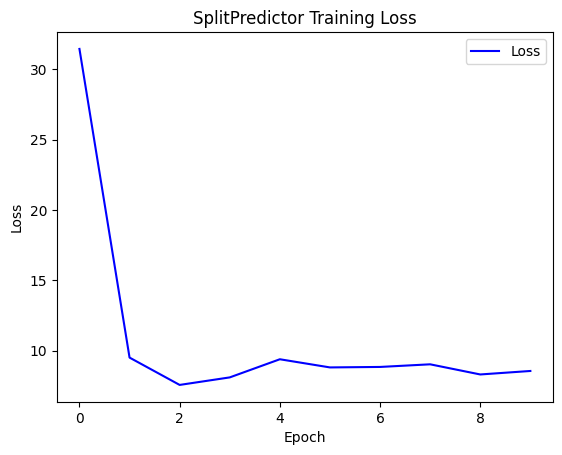

In [125]:
import matplotlib.pyplot as plt

# 将损失值存储到一个列表中
loss_values = [31.434354782104492, 9.511914253234863, 7.570372581481934, 8.104835510253906, 9.393156051635742,
               8.813292503356934, 8.847393989562988, 9.034137725830078, 8.31317138671875, 8.560961723327637]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SplitPredictor Training Loss')
plt.legend()
plt.show()

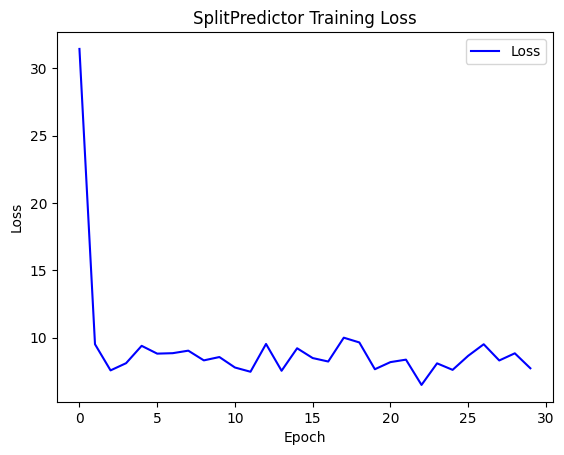

In [161]:
import matplotlib.pyplot as plt

# 更新的损失值数据
loss_values = [31.434354782104492,9.511914253234863, 7.570372581481934, 8.104835510253906, 9.393156051635742, 8.813292503356934,
               8.847393989562988, 9.034137725830078, 8.31317138671875, 8.560961723327637, 7.784006118774414,
               7.468694686889648, 9.532322883605957, 7.542031764984131, 9.212428092956543, 8.485958099365234,
               8.227889060974121, 9.997629165649414, 9.644856452941895, 7.655792713165283, 8.184334754943848,
               8.367484092712402, 6.491052150726318, 8.093092918395996, 7.609314441680908, 8.651530265808105,
               9.510211944580078, 8.30667495727539, 8.837848663330078, 7.7274956703186035]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SplitPredictor Training Loss')
plt.legend()
plt.show()

In [164]:
# Conformal Quantile Regression
print("########################## CQR ###########################")

model = build_regression_model("NonLinearNet")(32*32*3, 2, 64, 0.5).to(device)
criterion = QuantileLoss(quantiles)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 30
for epoch in range(epochs):
    train(model, device, epoch, train_loader, criterion, optimizer)

model.eval()
predictor = CQR(model)
# 在 CQR 部分使用 squeeze()
tmp_prediction_intervals = predictor.predict(tmp_x).squeeze(0)
predictor.calibrate(train_loader, alpha)
print(predictor.evaluate(test_loader))

for i, (test_x, _) in enumerate(test_loader):
    with torch.no_grad():
        cal_x = torch.stack([test_x[0] for _ in range(len(test_loader.dataset))]).to(device)
#         cal_dataset = torch.utils.data.TensorDataset(cal_x, torch.tensor(test_y).to(device))
        cal_dataset = torch.utils.data.TensorDataset(cal_x, torch.tensor(test_y).unsqueeze(-1).to(device))
        cal_data_loader = torch.utils.data.DataLoader(cal_dataset, batch_size=100, shuffle=False, pin_memory=False)
        predictor.calibrate(cal_data_loader, alpha)
        tmp_x = test_x[0].unsqueeze(0).to(device)
        if i == 0:
            tmp_prediction_intervals = predictor.predict(tmp_x).unsqueeze(0)
        else:
            tmp_prediction_intervals = predictor.predict(tmp_x, test_y[i - 1].unsqueeze(0), predicts[i - 1].unsqueeze(0))
        predicts[i] = tmp_prediction_intervals.unsqueeze(0)

print("Evaluating prediction sets...")
with torch.no_grad():
    prediction_sets = torch.cat(predicts, dim=0)
    targets = torch.tensor(test_y).to(device)
    coverage_rate = metrics.coverage_rate(prediction_sets, targets)
    average_size = metrics.average_size(prediction_sets)
print(f"Coverage_rate: {coverage_rate}")
print(f"Average_size: {average_size}")



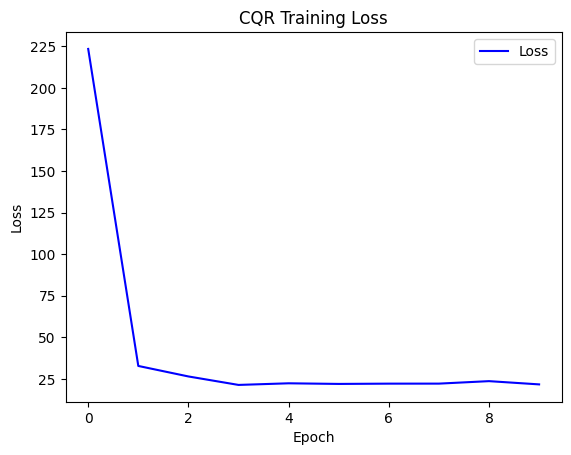

In [128]:
import matplotlib.pyplot as plt

# 将损失值存储到一个列表中
loss_values = [223.44544982910156, 32.81275177001953, 26.494556427001953, 21.400959014892578, 22.37490463256836,
               21.999813079833984, 22.169071197509766, 22.18227767944336, 23.673236846923828, 21.721485137939453]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CQR Training Loss')
plt.legend()
plt.show()

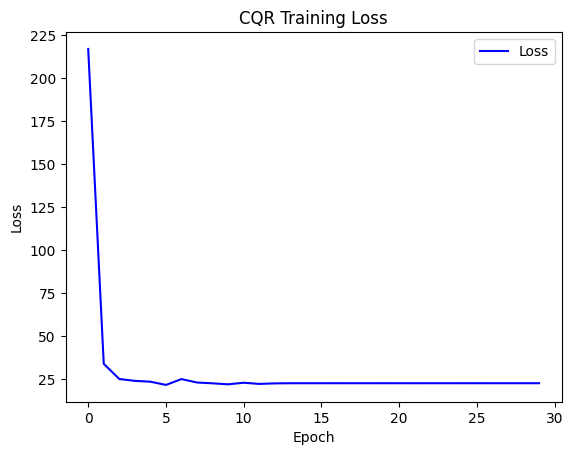

In [163]:
import matplotlib.pyplot as plt

# 更新的损失值数据
loss_values = [217.00575256347656,33.817787170410156, 24.95594596862793, 23.875267028808594, 23.39569854736328, 21.516624450683594,
               24.91286849975586, 22.911767959594727, 22.443620681762695, 21.863447189331055, 22.791736602783203,
               22.107681274414062, 22.410402297973633, 22.501625061035156, 22.503374099731445, 22.50017547607422,
               22.51568603515625, 22.504714965820312, 22.502914428710938, 22.512449264526367, 22.50495147705078,
               22.499914169311523, 22.503814697265625, 22.502290725708008, 22.514739990234375, 22.519393920898438,
               22.50436019897461, 22.50678062438965, 22.512630462646484, 22.510520935058594]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CQR Training Loss')
plt.legend()
plt.show()

In [167]:
print("########################## ACI ###########################")
model = build_regression_model("NonLinearNet")(32*32*3, 2, 64, 0.5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 30
for epoch in range(epochs):
    train(model, device, epoch, train_loader, criterion, optimizer)

model.eval()
predictor = ACI(model, 0.0001)
metrics = Metrics()

predicts = torch.zeros((len(test_loader.dataset), 2)).to(device)
test_y = test_dataset.targets

for i, (test_x, _) in enumerate(test_loader):
    with torch.no_grad():
        cal_x = torch.stack([test_x[0] for _ in range(len(test_loader.dataset))]).to(device)
#         cal_dataset = torch.utils.data.TensorDataset(cal_x, torch.tensor(test_y).to(device))
        cal_dataset = torch.utils.data.TensorDataset(cal_x, torch.tensor(test_y).unsqueeze(-1).to(device))
        cal_data_loader = torch.utils.data.DataLoader(cal_dataset, batch_size=100, shuffle=False, pin_memory=False)
        predictor.calibrate(cal_data_loader, alpha)
        tmp_x = test_x[0].unsqueeze(0).to(device)
        if i == 0:
            tmp_prediction_intervals = predictor.predict(tmp_x).unsqueeze(0)
        else:
            tmp_prediction_intervals = predictor.predict(tmp_x, test_y[i - 1].unsqueeze(0), predicts[i - 1].unsqueeze(0))
        predicts[i] = tmp_prediction_intervals.unsqueeze(0)

print("Evaluating prediction sets...")
with torch.no_grad():
    prediction_sets = torch.cat(predicts, dim=0)
    targets = torch.tensor(test_y).to(device)
    coverage_rate = metrics.coverage_rate(prediction_sets, targets)
    average_size = metrics.average_size(prediction_sets)
print(f"Coverage_rate: {coverage_rate}")
print(f"Average_size: {average_size}")

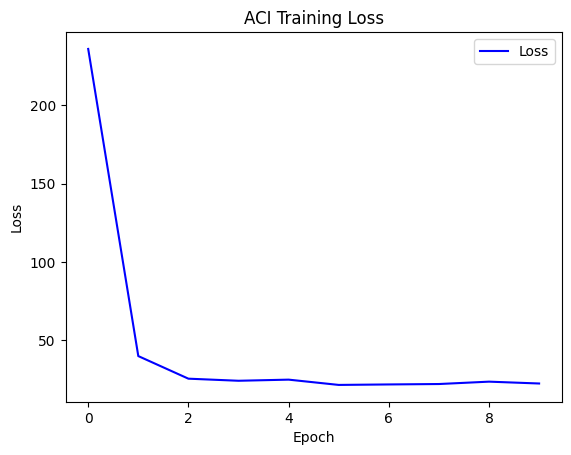

In [130]:
import matplotlib.pyplot as plt

# 将损失值存储到一个列表中
loss_values = [236.07769775390625, 39.937835693359375, 25.507587432861328, 24.176029205322266, 24.892269134521484,
               21.5205135345459, 21.82608413696289, 22.092323303222656, 23.60740089416504, 22.42974090576172]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ACI Training Loss')
plt.legend()
plt.show()

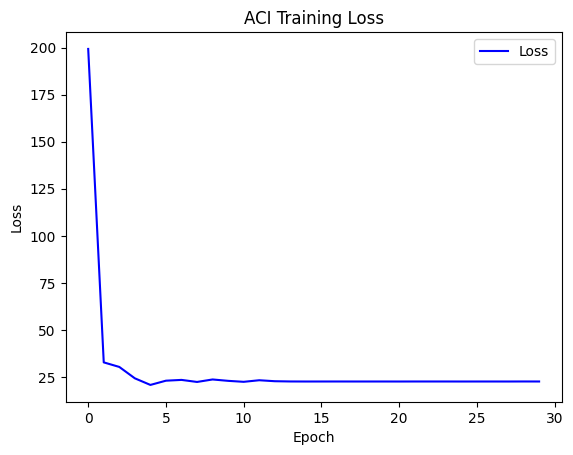

In [166]:
import matplotlib.pyplot as plt

# 更新的损失值数据
loss_values = [199.3812255859375,32.676239013671875, 30.25471305847168, 24.198074340820312, 20.688369750976562, 22.94036293029785,
               23.357391357421875, 22.27036476135254, 23.587478637695312, 22.857173919677734, 22.337881088256836,
               23.17713165283203, 22.661624908447266, 22.526832580566406, 22.50208854675293, 22.50817108154297,
               22.51396942138672, 22.50769805908203, 22.507076263427734, 22.50835418701172, 22.500274658203125,
               22.514339447021484, 22.51404571533203, 22.513492584228516, 22.502389907836914, 22.50676155090332,
               22.508663177490234, 22.502174377441406, 22.524490356445312, 22.511112213134766]

# 创建一个列表作为 x 轴坐标，取值从 0 到样本个数总数
epochs = list(range(len(loss_values)))

# 绘制折线图
plt.plot(epochs, loss_values, 'b-', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ACI Training Loss')
plt.legend()
plt.show()